# Visualisation

## Installation

In [1]:
# !pip install graphviz
# !pip install pandas
# !pip install numpy
# !pip install imageio

## Import libraries

In [12]:
import graphviz
from math import sqrt
from PIL import Image
import imageio
import glob
import pandas as pd
import numpy as np

## Read in data from file

In [13]:
path = "./tex_res.txt"

df = pd.read_csv(path, sep=" ",header=None)
res_val = np.array(df.iloc[:,-1:])
res_vec = np.array(df.iloc[:,:-3])

## Generate a graph for a vector

In [14]:
import graphviz

def draw_edge(graph, from_node, to_node, colour):
    """
    Function to draw blue or red edge between two nodes on 
    a given graph
    
    Parameters: 
        graph: the graphviz.Digraph object
        from_node: name of the starting node, in type string
        to_end: name of the ending node, in type string
        colour: colour of the edge, in type string
    """
    if (colour == 1):
        colour = 'blue'
    else: 
        colour = 'red'
        
    graph.edge(from_node, to_node, color = colour,
               arrowhead='normal', arrowtail='normal')

def draw_circuit(lst, score): 
    """
    Function to draw the whole circuit
    
    Parameters: 
        lst: list of vector connections 
        score: optimum value, in type float 
    """
    
    # Initialise a graph
#     graph = graphviz.Digraph('node', graph_attr={
#                              'splines': 'ortho',
#                              'nodesep': '0.8', 
#                              'overlap': 'false',
#                              'concentrate' : 'true'},
#                               node_attr={'shape': 'box'})

    graph = graphviz.Digraph('node', graph_attr={
                             'splines': 'ortho',
                             'nodesep': '0.8', 
                             'overlap': 'false'},
                              node_attr={'shape': 'box'})
    
    graph.attr(rankdir = 'LR')
    
    # Create Feed node and connect to the first node in the list
    graph.node('Feed')
    unit_name = 'Unit ' + str(lst[0])
    draw_edge(graph, 'Feed', unit_name, 1)
    
    # Current index number 
    index = 0
    
    # Loop through the list elements 
    for i in range(1, len(lst) - 1, 2):
        # Create the starting node 
        from_node = 'Unit ' + str(index)
        
        for j in range(2): 
            # If first/second node that the starting node 
            # links to the maximum value in the list 
            if (lst[i + j] == max(lst) - 1): 
                to_node = 'Concentrate'

            # If first/second node that the starting node 
            # links to the next maximum value in the list 
            elif (lst[i + j] == max(lst)): 
                to_node = 'Tailing'

            # Connect to its nodes
            else: 
                to_node = 'Unit ' + str(lst[i + j])
        
            # Draw the edge between the nodes
            draw_edge(graph, from_node, to_node, j)
        
        index+=1
    
    label_msg = '\nOptimum: '+ str(score) + '\n' + 'Vector: ['+ ', '.join(str(ele) for ele in lst) + ']'
    graph.attr(label = label_msg, ontsize = '20')
    
    # Output result to a graph
    graph.render(filename = './Images/res', cleanup = True, format = 'png')
    
    return graph   

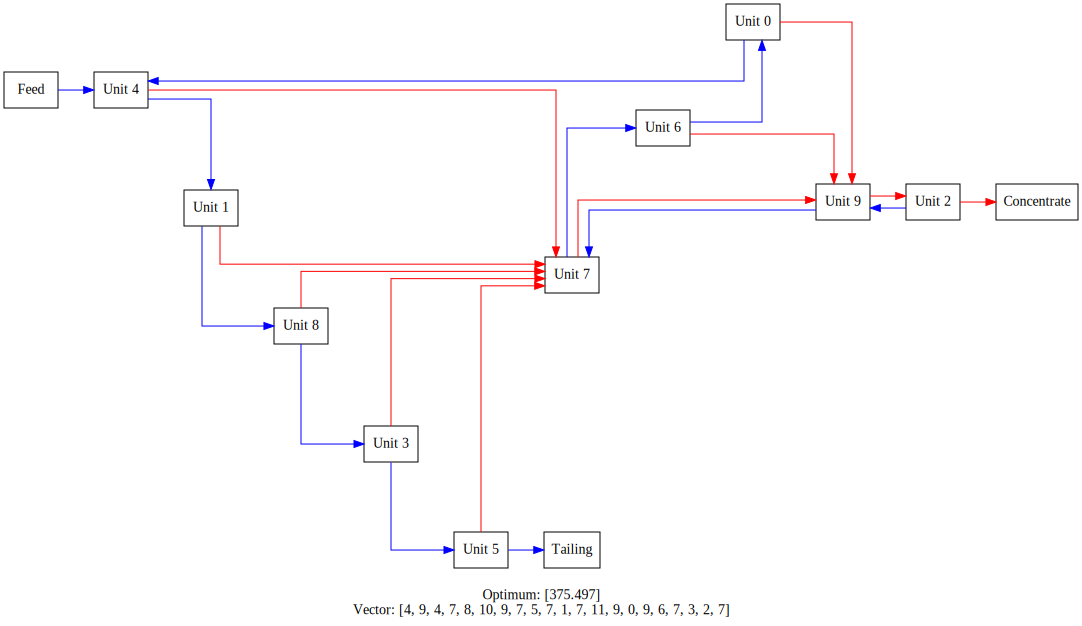

In [15]:
draw_circuit(res_vec[-1], res_val[-1])    

## Generate an animated gif for vectors

In [16]:
def draw_animate_circuit(lst, score, img_ind): 
    """
    Function to draw the whole circuit
    
    Parameters: 
        lst: list of vector connections 
        score: optimum value, in type float 
    """
    
    # Initialise a graph with different attributes
    graph = graphviz.Digraph('node', engine='neato', graph_attr={
                             'splines': 'ortho',
                             'nodesep': '0.8', 
                             'overlap': 'false',
                             'concentrate' : 'true'},
                             node_attr={'shape': 'box','pin' : 'true'})

    graph.attr(rankdir = 'LR', size = '10,10!', ratio = 'fill', margin = '0')
    
    # Create Feed node and connect to the first node in the list
    graph.node('Feed', pos = '0,0!')
    unit_name = 'Unit ' + str(lst[0])
    
    # Set position of the node 
    pos1 = str(lst[0] % size)
    pos2 = str(lst[0] // size)
    pos = pos1 + ',' + pos2 + '!'            
    graph.node(unit_name, pos=pos)

    draw_edge(graph, 'Feed', unit_name, 1)
    
    # Current index number 
    index = 0
    
    # Loop through the list elements 
    for i in range(1, len(lst) - 1, 2):
        # Create the starting node 
        from_node = 'Unit ' + str(index)
        
        # Set position of the node 
        pos1 = str(index % size)
        pos2 = str(index // size)
        pos = pos1 + ',' + pos2 + '!'
        graph.node(from_node, pos=pos)
        
        for j in range(2): 
            # If first/second node that the starting node 
            # links to the maximum value in the list 
            if (lst[i + j] == max(lst) - 1): 
                to_node = 'Concentrate'

            # If first/second node that the starting node 
            # links to the next maximum value in the list 
            elif (lst[i + j] == max(lst)): 
                to_node = 'Tailing'

            # Connect to its nodes
            else: 
                to_node = 'Unit ' + str(lst[i + j])

            pos1 = str(lst[i + j] % size)
            pos2 = str(lst[i + j] // size)
            pos = pos1 + ',' + pos2 + '!'
            
            graph.node(to_node, pos=pos)
        
            # Draw the edge between the nodes
            draw_edge(graph, from_node, to_node, j)
        
        index+=1
    
    label_msg = '\nOptimum: '+ str(score) + '\n' + 'Vector: ['+ ', '.join(str(ele) for ele in lst) + ']'
    graph.attr(label = label_msg, fontsize ='20')
    
    # Output result to a graph
    graph.render(filename = './Ani_images/res_' + str(f"{img_ind:03}"), format = 'png')
    
    
    return graph   

In [17]:
size = round(sqrt(len(res_vec[0])))
ind = 0

for i in range(len(res_vec)): 
    draw_animate_circuit(res_vec[i], res_val[i], ind)
    ind += 1

In [18]:
path = "./Ani_images/"
images = sorted(glob.glob(path + "*.png"))

# Create an animated graph
with imageio.get_writer('ani_res.gif', mode='I', duration = 0.5) as writer:
    for img in images:
        image = Image.open(img)
        # Resize each graph such that they are consistent 
        image = image.resize((500,500),Image.ANTIALIAS)
        image.save(fp = img)
        image = imageio.imread(img)
        writer.append_data(image)